In [152]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df = joblib.load("../../../kospi200_preprocessed.pkl")
df.head()


,date,time,open,high,low,close,prevClose,vol
2010-02-16 09:01:00,20100216,901,207.55,207.65,207.50,207.60,207.5,3985.0
2010-02-16 09:02:00,20100216,902,207.60,207.65,207.25,207.55,207.5,5095.0
2010-02-16 09:03:00,20100216,903,207.55,207.80,207.50,207.60,207.5,2175.0
2010-02-16 09:04:00,20100216,904,207.55,207.85,207.55,207.80,207.5,1301.0
2010-02-16 09:05:00,20100216,905,207.80,208.15,207.80,208.05,207.5,3870.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941826 entries, 2010-02-16 09:01:00 to 2020-04-03 15:45:00
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       940997 non-null  object 
 1   time       940997 non-null  object 
 2   open       940997 non-null  float64
 3   high       940997 non-null  float64
 4   low        940997 non-null  float64
 5   close      940997 non-null  float64
 6   prevClose  940997 non-null  float64
 7   vol        940997 non-null  float64
dtypes: float64(6), object(2)
memory usage: 64.7+ MB


In [30]:
df.describe()

,open,high,low,close,prevClose,vol
count,940997.000000,940997.000000,940997.000000,940997.000000,940997.000000,940997.000000
mean,264.987276,265.053434,264.920993,264.987191,264.969756,542.931899
std,26.158111,26.153471,26.162358,26.157964,26.157177,641.807158
min,194.750000,195.600000,194.700000,194.750000,197.500000,1.000000
25%,248.150000,248.200000,248.100000,248.150000,248.300000,156.000000
50%,260.900000,261.000000,260.850000,260.900000,260.850000,344.000000
75%,277.400000,277.500000,277.350000,277.400000,277.550000,691.000000
max,340.250000,340.300000,340.150000,340.250000,339.900000,22348.000000


In [42]:
df[df.isna().any(axis=1)]


,date,time,open,high,low,close,prevClose,vol
2010-07-16 09:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-16 09:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-16 09:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-16 09:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-16 09:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-03-19 12:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-19 12:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-19 12:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-19 12:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Volume

In [49]:
# 기본적인 통계량 확인
print("기술 통계량:")
print(df['vol'].describe())


기술 통계량:
count    940997.000000
mean        542.931899
std         641.807158
min           1.000000
25%         156.000000
50%         344.000000
75%         691.000000
max       22348.000000
Name: vol, dtype: float64


## 히스토그램과 박스플롯을 통해 분포 확인

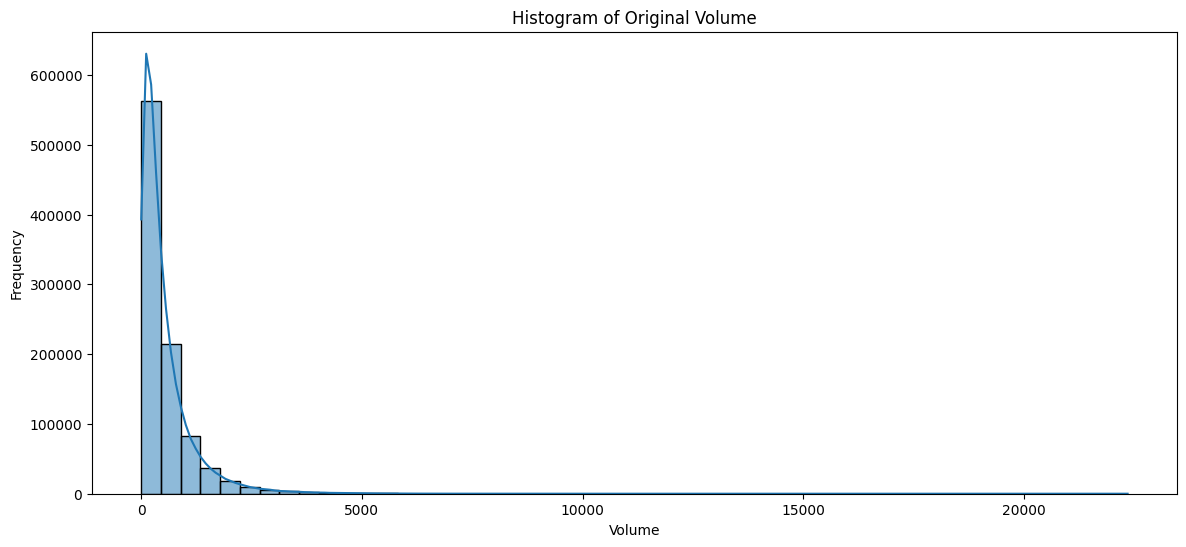

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(df['vol'], bins=50, kde=True)
plt.title('Histogram of Original Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.show()


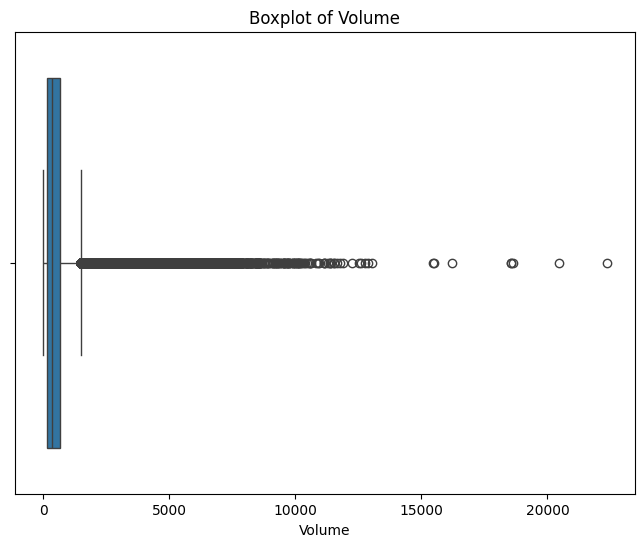

이상치 개수: 65248


In [64]:
# 거래량의 이상치 탐지 (박스플롯, IQR 활용)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['vol'])
plt.title('Boxplot of Volume')
plt.xlabel('Volume')
plt.show()

# IQR을 사용하여 이상치 탐지
Q1 = df['vol'].quantile(0.25)
Q3 = df['vol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['vol'] < lower_bound) | (df['vol'] > upper_bound)]
print(f"이상치 개수: {outliers.shape[0]}")


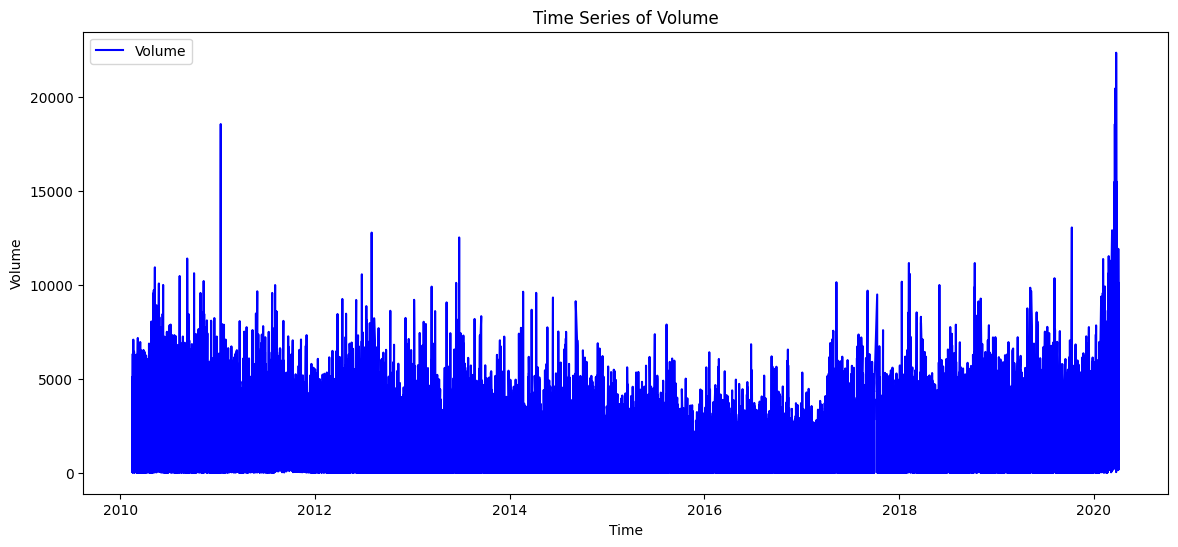

In [ ]:
# 시계열 데이터로 시간에 따른 패턴 분석 (기본적인 시계열 그래프)
plt.figure(figsize=(14, 6))
plt.plot(df['vol'], label='Volume', color='blue')
plt.title('Time Series of Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()


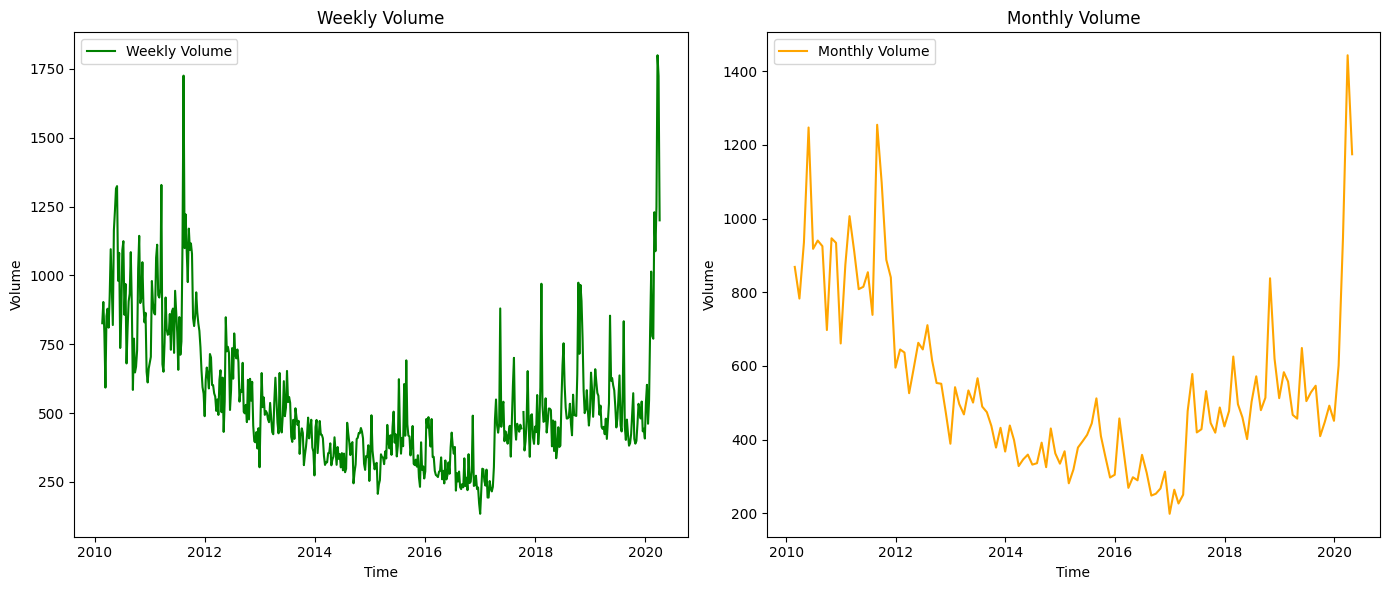

In [ ]:
# 일간, 주간, 월간 변동 비교 (Resampling 활용)

df_daily = df.resample('D')['vol'].mean()  # 일간 데이터
df_weekly = df.resample('W')['vol'].mean()  # 주간 데이터
df_monthly = df.resample('ME')['vol'].mean()  # 월간 데이터

# 주간, 월간 데이터 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df_weekly, label='Weekly Volume', color='green')
plt.title('Weekly Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_monthly, label='Monthly Volume', color='orange')
plt.title('Monthly Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

## 거래량과 가격 변화율의 관계 분석
- 거래량이 가격 변동을 유발하는지 확인

C:\Users\smlee\AppData\Local\Temp\ipykernel_8736\456739502.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['close_change'] = df['close'].pct_change()  # 가격 변동률


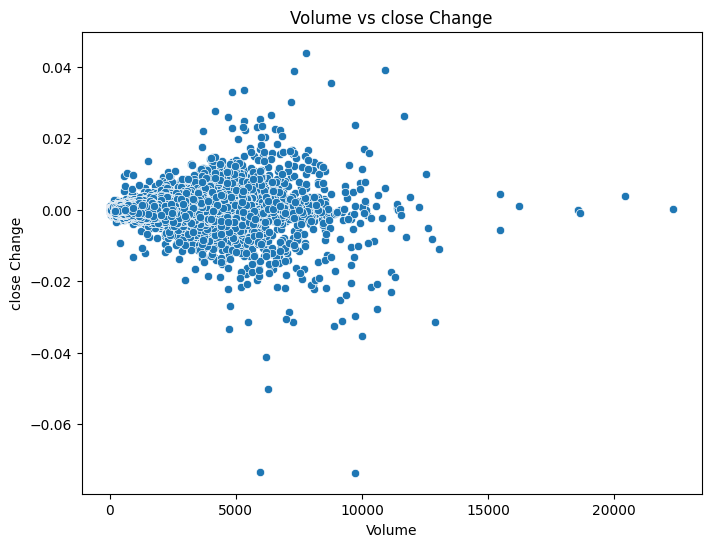

상관관계:
                   vol  close_change
vol           1.000000     -0.004494
close_change -0.004494      1.000000


In [ ]:
# 거래량과 가격 변화의 관계 분석 
df['close_change'] = df['close'].pct_change()  # 가격 변동률
# 이전 값과 비교하여 변화율 계산산

# 거래량과 가격 변동률의 상관관계 분석
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['vol'], y=df['close_change'])
plt.title('Volume vs close Change')
plt.xlabel('Volume')
plt.ylabel('close Change')
plt.show()

# 상관관계 분석
correlation = df[['vol', 'close_change']].corr()
print("상관관계:")
print(correlation)

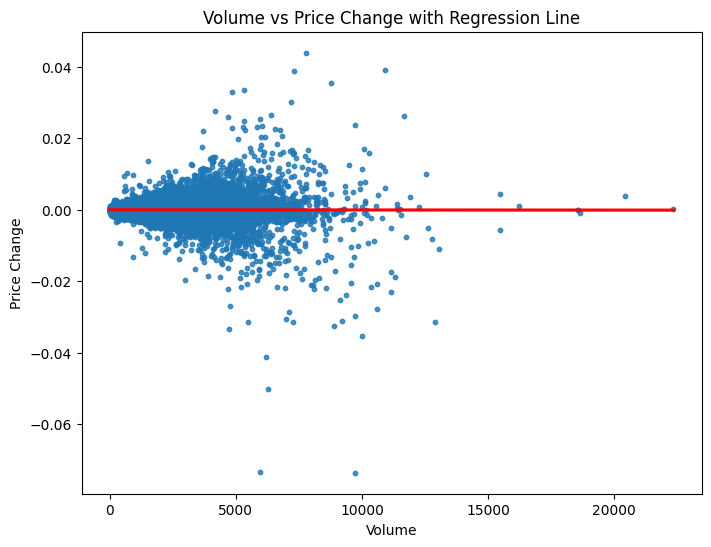

In [ ]:
# 거래량과 가격 변화의 관계를 더 구체적으로 보기 위해 회귀선 추가
plt.figure(figsize=(8, 6))
sns.regplot(x=df['vol'], y=df['close_change'], scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Volume vs Price Change with Regression Line')
plt.xlabel('Volume')
plt.ylabel('Price Change')
plt.show()


## 가격의 변동성

C:\Users\smlee\AppData\Local\Temp\ipykernel_8736\164898890.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['volatility'] = df['vol'].pct_change().rolling(window=80).std()  # 5일 이동 표준편차


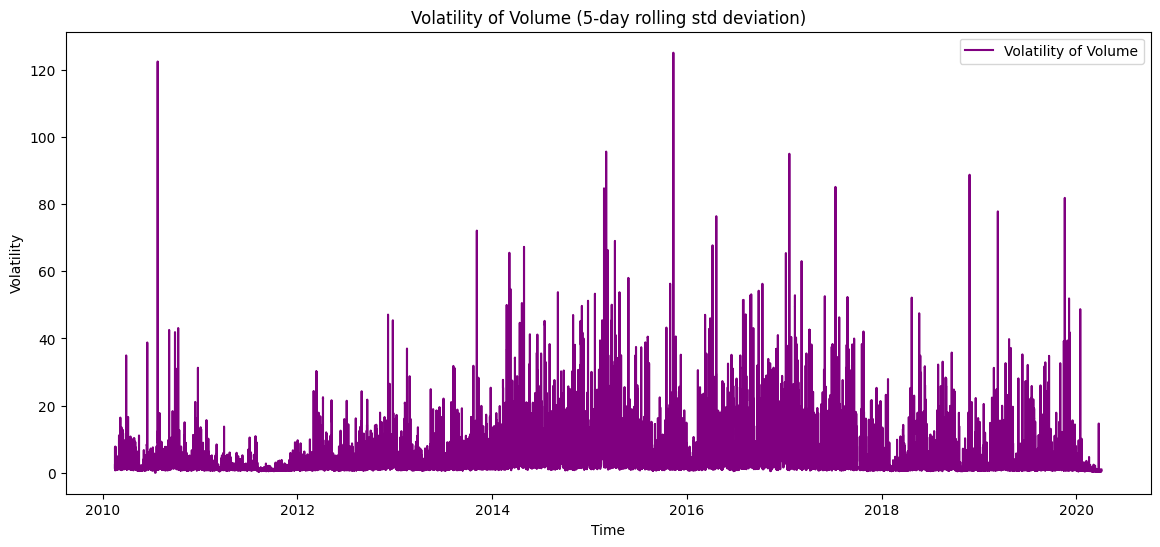

In [ ]:
# 거래량의 변동성 (Volatility) 분석
df['volatility'] = df['vol'].pct_change().rolling(window=80).std()  # 80분 이동 표준편차

plt.figure(figsize=(14, 6))
plt.plot(df['volatility'], label='Volatility of Volume', color='purple')
plt.title('Volatility of Volume (5-day rolling std deviation)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()


1. 📈 급격한 변동성 증가 → 거래량 폭증
- 특정 구간에서 변동성이 급격히 증가했다면 큰 거래(급등/급락)가 발생했을 가능성이 높다
- 뉴스, 경제 이벤트, 매크로 트렌드 등의 영향을 받을 수도 있음
- 이럴 경우 해당 날짜/시간을 확인해 보면 원인을 찾을 수 있다
2. 📉 변동성이 낮은 구간 → 안정적인 거래
- 변동성이 낮으면 거래량 변화가 크지 않고, 시장이 조용하다는 뜻
- 일정한 패턴을 유지하는 경우도 있음
3.  반복적인 변동 패턴이 있는지 확인
- 예를 들어 특정 시간대(장 시작, 장 마감)마다 변동성이 높아지는지 확인 가능
- 주간/월간 단위로 변동성이 증가하는 패턴이 있다면, 특정 요일/시간에 거래량이 몰리는지 분석 가능

<Axes: xlabel='hour'>

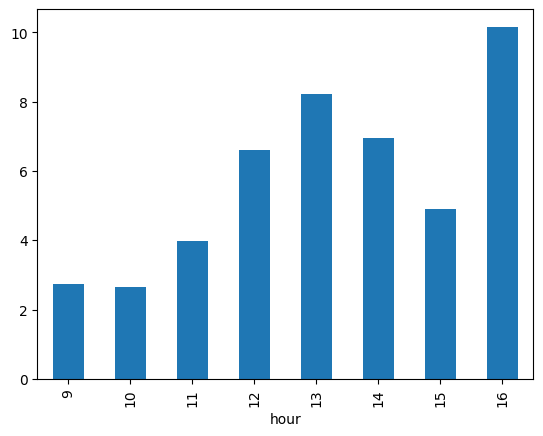

In [ ]:
# 특정 요일/시간에 변동성이 높은지 확인
df['hour'] = df.index.hour
df.groupby('hour')['volatility'].mean().plot(kind='bar')

In [ ]:
# 변동성이 가격 변화(close_change)와 연관 있는지 확인
df[['close_change', 'volatility']].corr()


,close_change,volatility
close_change,1.000000,0.000232
volatility,0.000232,1.000000


## 거래량 이동평균(Volume Moving Average) 분석
- 단기 vs. 장기 이동평균 → 거래량 추세 파악

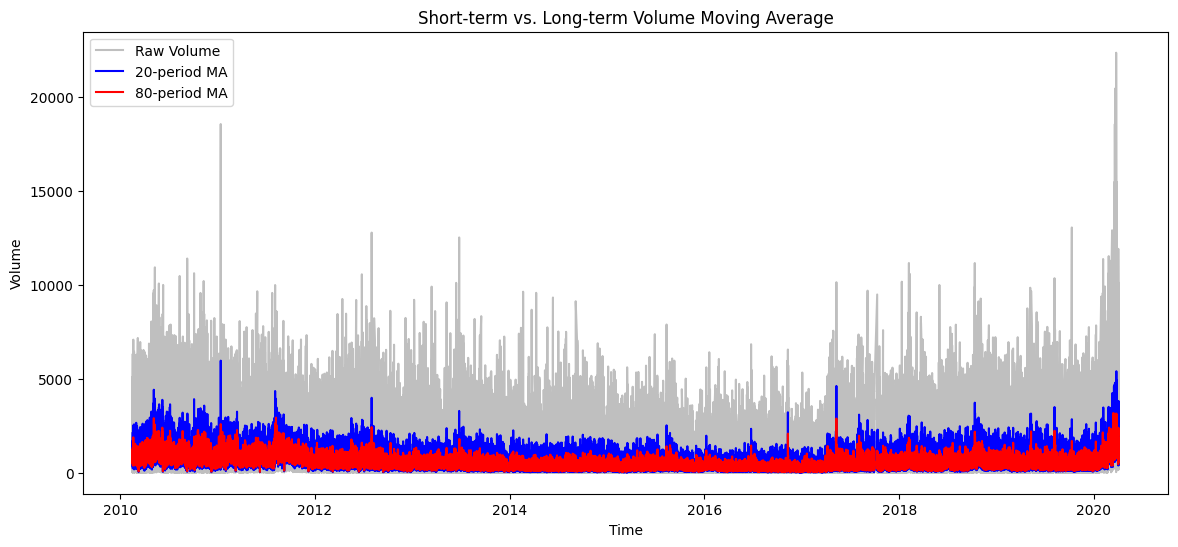

In [71]:
df['vol_ma_20'] = df['vol'].rolling(window=20).mean()  # 5개 단위 이동평균
df['vol_ma_80'] = df['vol'].rolling(window=80).mean()  # 20개 단위 이동평균

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['vol'], alpha=0.5, label='Raw Volume', color='gray')
plt.plot(df.index, df['vol_ma_20'], label='20-period MA', color='blue')
plt.plot(df.index, df['vol_ma_80'], label='80-period MA', color='red')
plt.title('Short-term vs. Long-term Volume Moving Average')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()


## 거래량의 요일/시간 패턴 분석
- 특정 시간대에 거래량이 몰리는지 파악

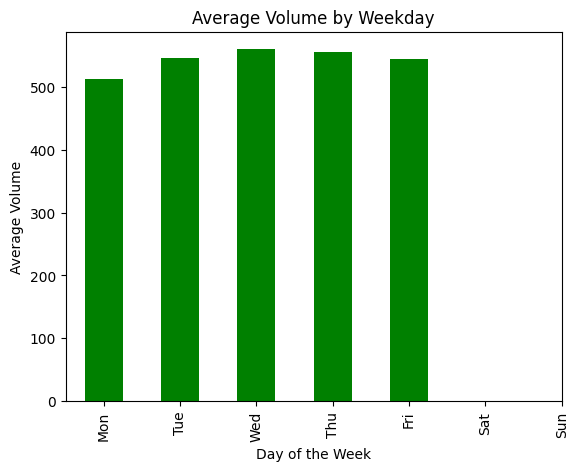

In [75]:
# 요일별 거래량 평균

df['weekday'] = df.index.dayofweek  # 0=월요일, 6=일요일
df.groupby('weekday')['vol'].mean().plot(kind='bar', color='green')
plt.title('Average Volume by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Volume')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


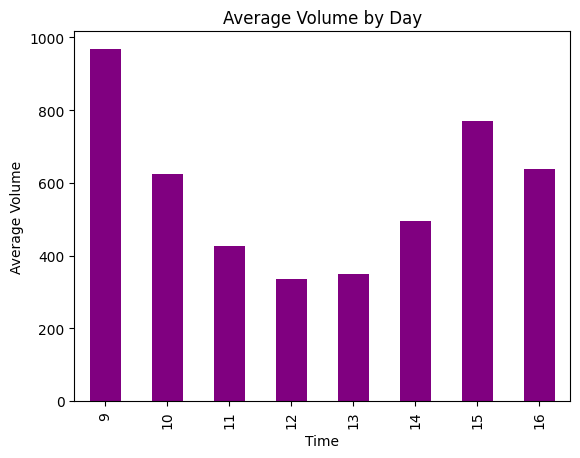

In [79]:
# 시간대별 거래량 평균

df.groupby('hour')['vol'].mean().plot(kind='bar', color='purple')
plt.title('Average Volume by Day')
plt.xlabel('Time')
plt.ylabel('Average Volume')
plt.show()


## 거래량과 변동성(Volatility)의 관계 분석
- 변동성이 커질 때 거래량도 같이 증가하는지 확인

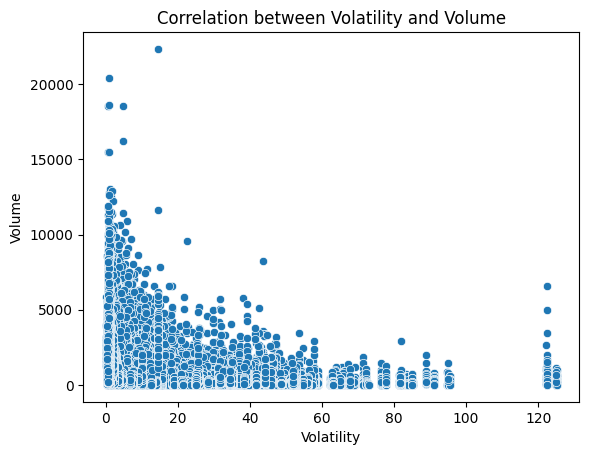

,volatility,vol
volatility,1.000000,-0.200004
vol,-0.200004,1.000000


In [80]:
sns.scatterplot(x=df['volatility'], y=df['vol'])
plt.title('Correlation between Volatility and Volume')
plt.xlabel('Volatility')
plt.ylabel('Volume')
plt.show()

df[['volatility', 'vol']].corr()  # 상관계수 계산


# Volume 전처리

In [92]:
df = joblib.load("../../../kospi200_preprocessed.pkl")

## 1. 이상치 처리: 로그 변환

In [93]:
df['vol_log'] = np.log1p(df['vol'])  # log(1 + x) 변환


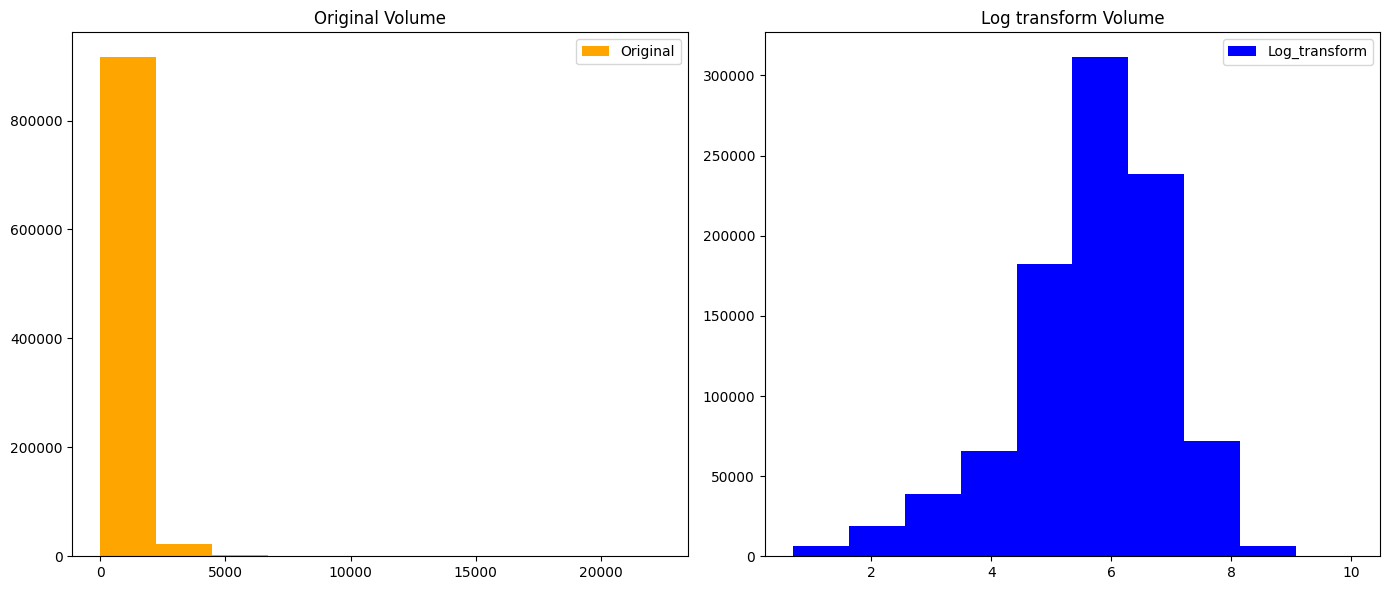

In [94]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(df['vol'], label='Original', color='orange')
plt.title('Original Volume')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['vol_log'], label='Log_transform', color='blue')
plt.title('Log transform Volume')
plt.legend()

plt.tight_layout()
plt.show()


## 2. 스무딩 & 이동 평균
- 변동성을 완화하고 패턴을 부드럽게 만들기 위해 사용

### (1) 단순 이동 평균

In [95]:
df['vol_sma_5'] = df['vol'].rolling(window=5).mean()  # 5분 이동평균
df['vol_sma_20'] = df['vol'].rolling(window=20).mean()  # 20분 이동평균
df['vol_sma_80'] = df['vol'].rolling(window=80).mean()  # 80분 이동평균

### (2) 지수 이동평균
- 최근 거래량 변동을 더 빠르게 반영하고 싶을 때 사용

In [96]:
df['vol_ema'] = df['vol'].ewm(span=80, adjust=False).mean()  # 80단위 EMA


## 3. 스케일링

### (1) Min-Max Scaling
- 모델이 거리 기반 알고리즘(예: KNN, SVM)을 사용할 때
- 거래량 값의 범위를 제한하고 싶을 때

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['vol_scaled'] = scaler.fit_transform(df[['vol']])


### (2) Standard Scaling
- 정규 분포를 따르게 하고 싶을 때

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['vol_standardized'] = scaler.fit_transform(df[['vol']])


## 4. 시간별/요일별 패턴 반영한 특징 생성

### (1) 시간대별 평균 거래량 추가

In [99]:
df['hour'] = df.index.hour  # 시간대 추출
df['vol_hour_avg'] = df.groupby('hour')['vol'].transform('mean')  # 시간대별 평균 거래량


### (2) 요일별 평균 거래량 추가

In [100]:
df['weekday'] = df.index.dayofweek  # 요일 (0=월요일, 6=일요일)
df['vol_weekday_avg'] = df.groupby('weekday')['vol'].transform('mean')  # 요일별 평균 거래량


## 5. 거래량 변화율 계산

In [101]:
df['vol_change'] = df['vol'].pct_change()


C:\Users\smlee\AppData\Local\Temp\ipykernel_8736\3582059234.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['vol_change'] = df['vol'].pct_change()


In [103]:
df.columns

Index(['date', 'time', 'open', 'high', 'low', 'close', 'prevClose', 'vol',
       'vol_log', 'vol_sma_5', 'vol_sma_20', 'vol_sma_80', 'vol_ema',
       'vol_scaled', 'vol_standardized', 'hour', 'vol_hour_avg', 'weekday',
       'vol_weekday_avg', 'vol_change'],
      dtype='object')

# 블로그 보고 따라하기

In [123]:
data = joblib.load("../../../kospi200_preprocessed.pkl")

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941826 entries, 2010-02-16 09:01:00 to 2020-04-03 15:45:00
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       940997 non-null  object 
 1   time       940997 non-null  object 
 2   open       940997 non-null  float64
 3   high       940997 non-null  float64
 4   low        940997 non-null  float64
 5   close      940997 non-null  float64
 6   prevClose  940997 non-null  float64
 7   vol        940997 non-null  float64
dtypes: float64(6), object(2)
memory usage: 64.7+ MB


데이터의 date, time 먼저 채우기

In [127]:
data['date'] = data.index.strftime('%Y%m%d') 
data['time'] = data.index.strftime('%H%M').astype(int).astype(str)


## 1. 결측치

In [ ]:
# 결측치 확인
data.isna().sum()

date           0
time           0
open         829
high         829
low          829
close        829
prevClose    829
vol          829
dtype: int64

In [ ]:
# 결측치가 있는 컬럼 목록 생성
a = data.isnull().sum(0)
nullCol = [x for x in a.index if a[x] != 0]

# 보간법 적용
if len(nullCol) > 0:
    for c in nullCol:
        print('{} has Null'.format(c))
        data[c] = data[c].interpolate(method='time') # method='linear' , 'spline' 도 가능


open has Null
high has Null
low has Null
close has Null
prevClose has Null
vol has Null


## 2. 종가
- Standardization과 Normalization 중 어떤 방법을 적용하는게 가장 Robust한 모델을 만들 수 있을지
- Starndardization
    - 많은 논문에서 사용(결과 좋음)
    - Outlier에 대해서도 min-max Normalization과 비교했을 때 더 안정적
    - ** 그러나 평균 변화에 대한 민감도"가 "최고 - 최저가의 변화에 대한 민감도" 보다 더욱 크다 **
        - 평균이 변화하는 것이 최고값과 최저값의 차이가 변하는 것보다 더 큰 영향을 미친다
        - 데이터 A: [100, 110, 120]
        - 데이터 B: [1000, 10000, 100000]
        - 두 데이터 모두 표준화하면 평균은 0, 표준편차는 1로 맞춰집니다. 하지만 데이터 B는 **범위(range)**가 훨씬 크기 때문에 최고-최저의 차이가 훨씬 더 크다. 하지만 표준화 후에는 평균의 변화가 더 중요한 역할을 하게 된다.
    
- 표준화는 종가에 대한 평균이 계속 바뀜. -> 이에 대한 변동성을 줄이고자 Min-Max Normalization을 선택
    - Min-Max Normalization의 가장 큰 문제: 범위를 초과하는 가격이 있을 시 스케일링이 이상하게 됨. -> 적정한 범위를 잡아야 한다.

count    941826.000000
mean        264.970306
std          26.163221
min         194.750000
25%         248.150000
50%         260.900000
75%         277.400000
max         340.250000
Name: close, dtype: float64


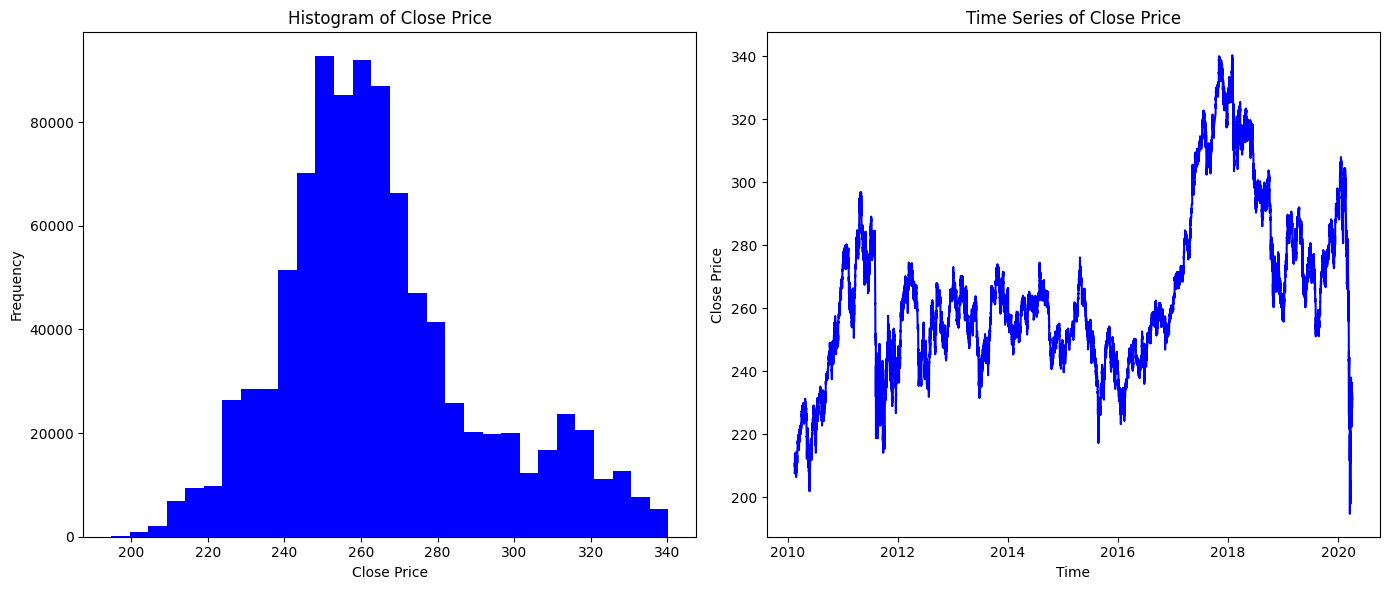

In [135]:
print(data['close'].describe())

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axs[0].hist(data['close'], bins=30, color='blue')
axs[0].set_title('Histogram of Close Price')
axs[0].set_xlabel('Close Price')
axs[0].set_ylabel('Frequency')

# Time series plot
axs[1].plot(data['close'], color='blue')
axs[1].set_title('Time Series of Close Price')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Close Price')

plt.tight_layout()
plt.show()


In [139]:
# 수동
# _max = max(data.close)
# _min = min(data.close)
# data['close_norm'] = data.close.apply(lambda x : (x-_min)/(_max-_min))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['close_norm'] = scaler.fit_transform(data[['close']])


count    941826.000000
mean          0.482614
std           0.179816
min           0.000000
25%           0.367010
50%           0.454639
75%           0.568041
max           1.000000
Name: close_norm, dtype: float64


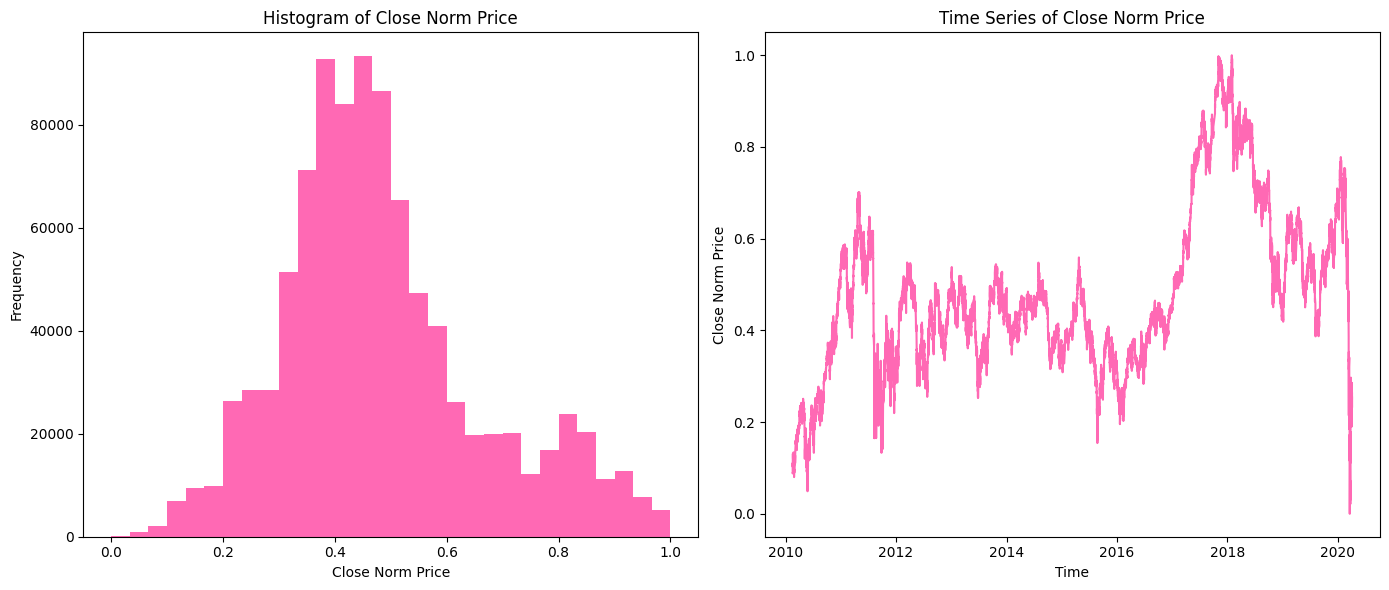

In [141]:
print(data['close_norm'].describe())

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axs[0].hist(data['close_norm'], bins=30, color='hotpink')
axs[0].set_title('Histogram of Close Norm Price')
axs[0].set_xlabel('Close Norm Price')
axs[0].set_ylabel('Frequency')

# Time series plot
axs[1].plot(data['close_norm'], color='hotpink')
axs[1].set_title('Time Series of Close Norm Price')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Close Norm Price')

plt.tight_layout()
plt.show()


## 3. 시가 저가 고가 변환
- 같은 값의 차이여도 종가 대비 얼마만큼의 비중을 차지하는지가 가격 흐름에 영향을 미친다.
- 시가, 저가, 고가를 종가에 대한 비율로 변환

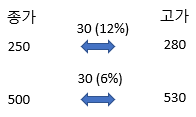

- `open_close_ratio`: 시가가 종가에 비해 얼마나 높거나 낮은지의 상대적인 비율을 파악
- `low_close_ratio` : 저가가 종가에 비해 얼마나 낮은지
- `high_close_ratio` : 고가가 종가에 비해 얼마나 차이가 나는지


In [ ]:
data['open_close_ratio'] = (data.open - data.close) / data.close
data['low_close_ratio'] = (data.low - data.close) / data.close
data['high_close_ratio'] = (data.high - data.close) / data.close


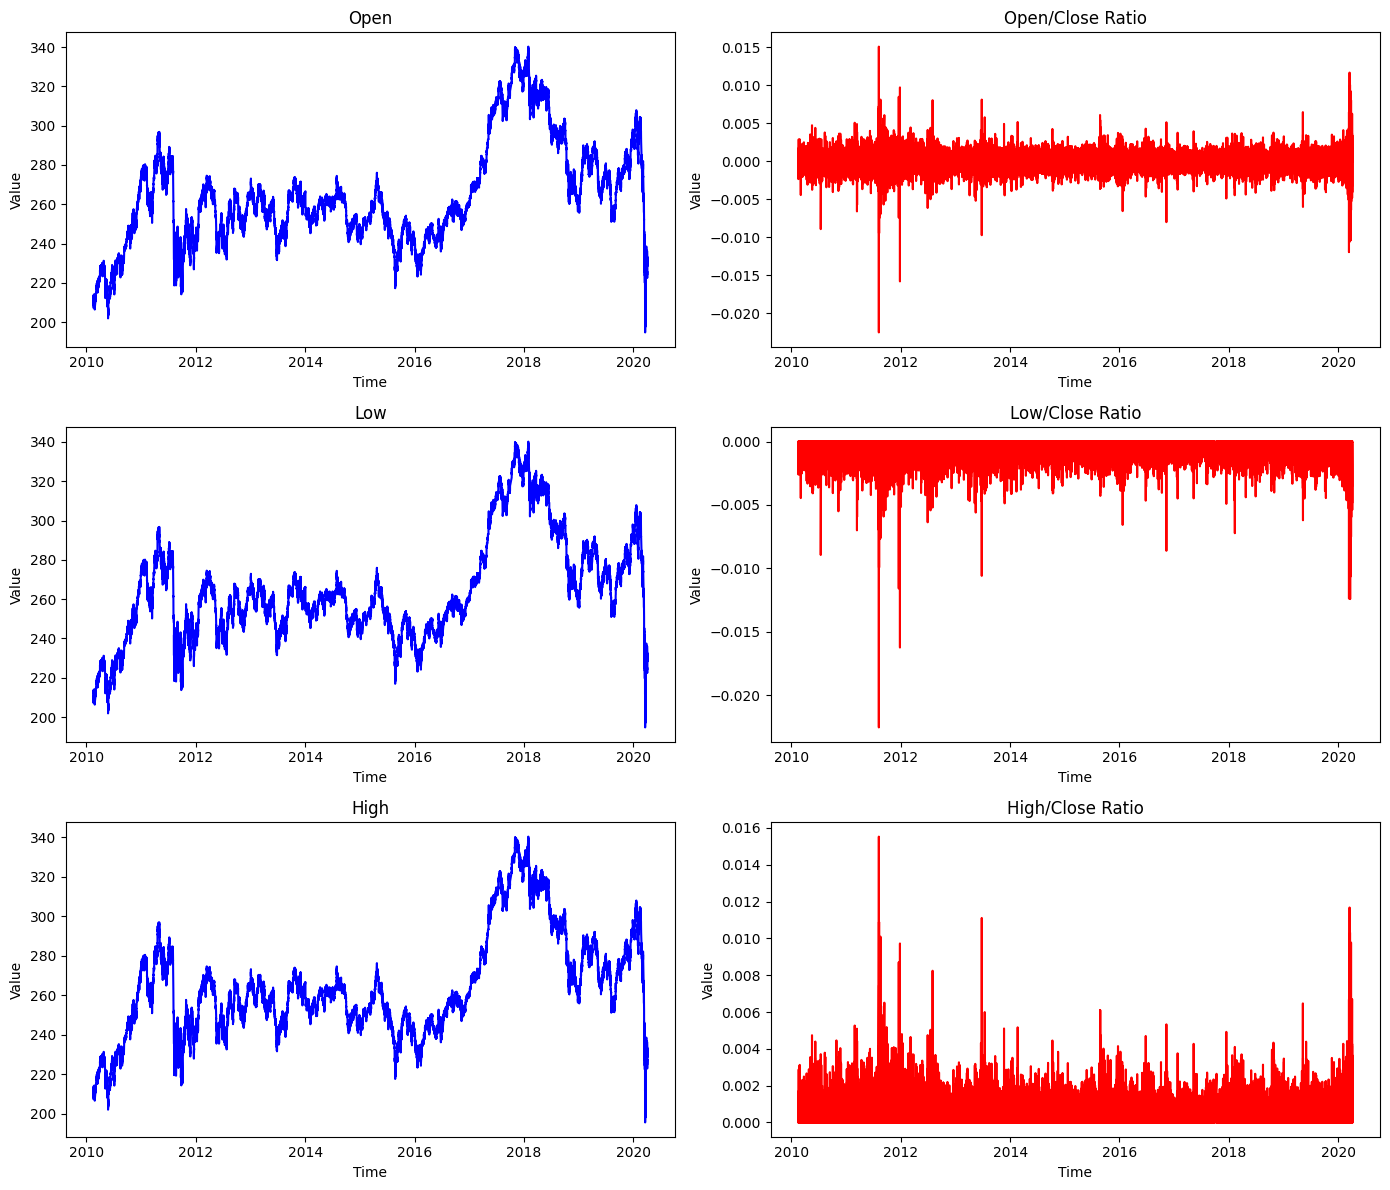

In [145]:
import matplotlib.pyplot as plt

# Create a 3x2 subplot (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# open vs open_close_ratio
axs[0, 0].plot(data['open'], label='Open', color='blue')
axs[0, 0].set_title('Open')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Value')

axs[0, 1].plot(data['open_close_ratio'], label='Open/Close Ratio', color='red')
axs[0, 1].set_title('Open/Close Ratio')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Value')

# low vs low_close_ratio
axs[1, 0].plot(data['low'], label='Low', color='blue')
axs[1, 0].set_title('Low')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Value')

axs[1, 1].plot(data['low_close_ratio'], label='Low/Close Ratio', color='red')
axs[1, 1].set_title('Low/Close Ratio')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Value')

# high vs high_close_ratio
axs[2, 0].plot(data['high'], label='High', color='blue')
axs[2, 0].set_title('High')
axs[2, 0].set_xlabel('Time')
axs[2, 0].set_ylabel('Value')

axs[2, 1].plot(data['high_close_ratio'], label='High/Close Ratio', color='red')
axs[2, 1].set_title('High/Close Ratio')
axs[2, 1].set_xlabel('Time')
axs[2, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()


## 4. 거래량
- 대부분 0에 가까이 분포, 수십에서 수 백배에 달하는 거래량도 함께 분포
- min-max normalization을 하면 대부분 0에 가까운 값을 가짐-> 매수, 매도 행동을 결정하는데 영향을 미치기 힘들다.
- standardization : 실제 분포되어 있는 값들과 비교했을 때 괴리감이 있기 때문에 제대로된 표준화가 어려움, 현 시점 거래량에 대한 가치와 차이가 크기 때문에 적용하기가 곤란
- Log Transformation: 최대한 거래량에 대한 정보를 살리면서 학습하기에 좋은 방향으로 변환
- Box-Cox Transformation: Log 변환 시 자연상수 e를 밑으로 사용하기 때문에 Scale의 Spectrum이 여전히 크다.

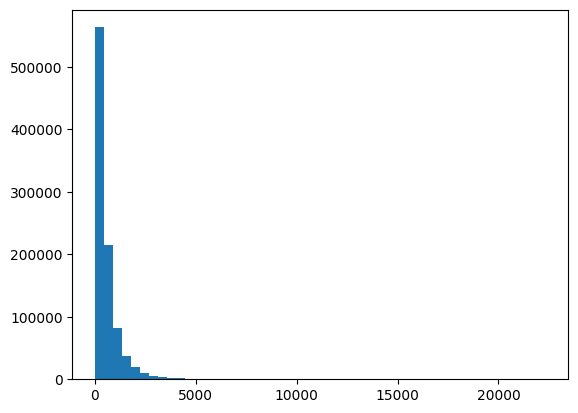

In [148]:
plt.hist(data['vol'], bins=50, label='Volume')
plt.show()

In [150]:
data['vol_log'] = np.log1p(data['vol'])  # log(1 + x) 변환
data['vol_boxcox'] = data['vol']**(1/3)  # Box-Cox 변환 (lambda=1/3)


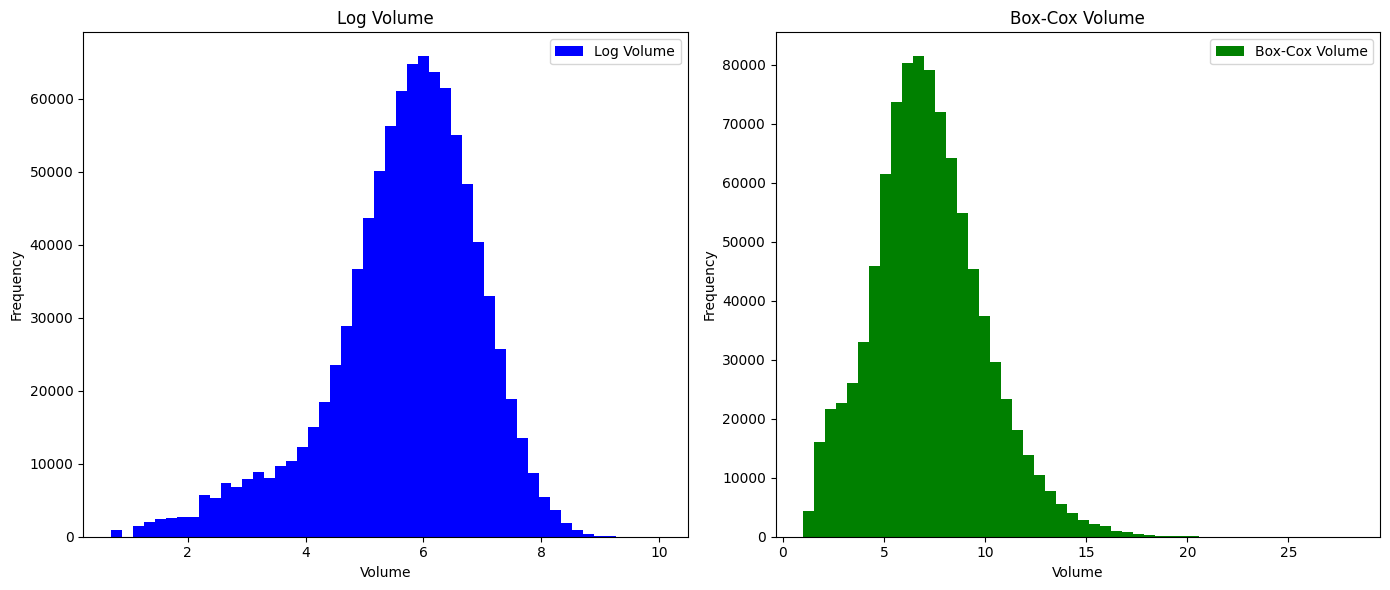

In [151]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  

ax[0].hist(data['vol_log'], bins=50, label='Log Volume', color='blue')
ax[0].set_title('Log Volume')
ax[0].set_xlabel('Volume')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(data['vol_boxcox'], bins=50, label='Box-Cox Volume', color='green')
ax[1].set_title('Box-Cox Volume')
ax[1].set_xlabel('Volume')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout() 
plt.show()


## 5. 지수 이동 평균
- EMA는 날짜가 현재에 가까울수록 더 많은 가중치를 부여 -> 최근의 가격을 좀 더 중요하게 바라봄

In [162]:
windows = [5, 10, 20, 60, 120]

for window in windows:
	# Normalization된 종가
    data['close_norm_ema{}'.format(window)] = \
        data['close_norm'].ewm(span = window, min_periods = window, adjust=False).mean()
    
    # log 변환되기 전의 거래량
    data['vol_ema{}'.format(window)] = \
        data['vol'].ewm(span = window, min_periods = window, adjust=False).mean()
    
    # log 변환
    data['vol_transform_ema{}'.format(window)] = np.log1p(data['vol_ema{}'.format(window)])
    

5
10
20
60
120


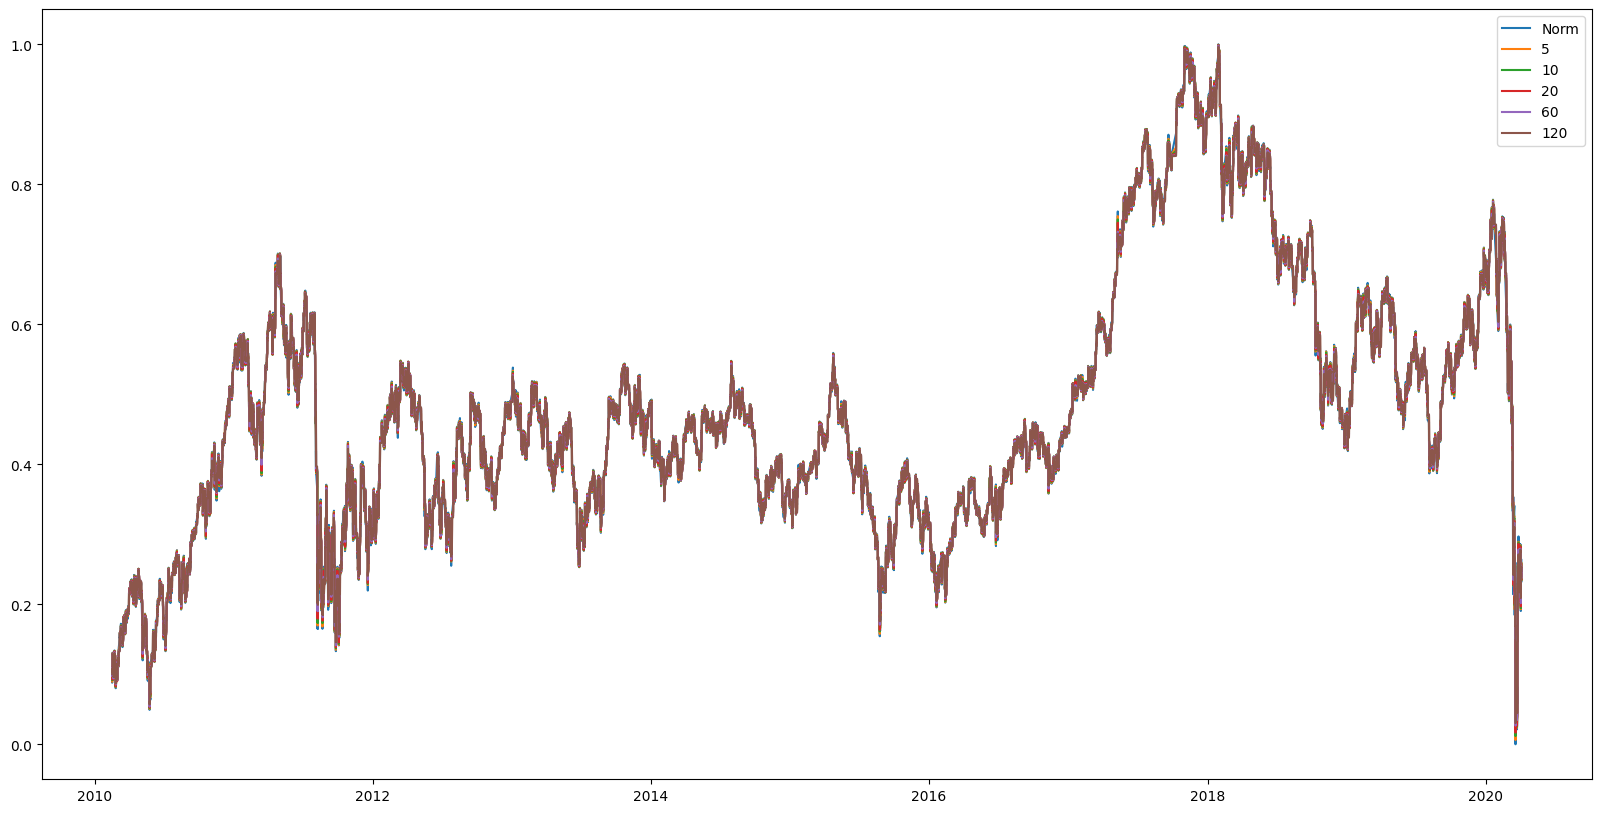

In [155]:
plt.figure(figsize=(20,10)) 
plt.plot(data['close_norm'], label = 'Norm')
for window in windows:
    print(window)
    plt.plot(data['close_norm_ema{}'.format(window)], label = window)
plt.legend()
plt.show()

5
10
20
60
120


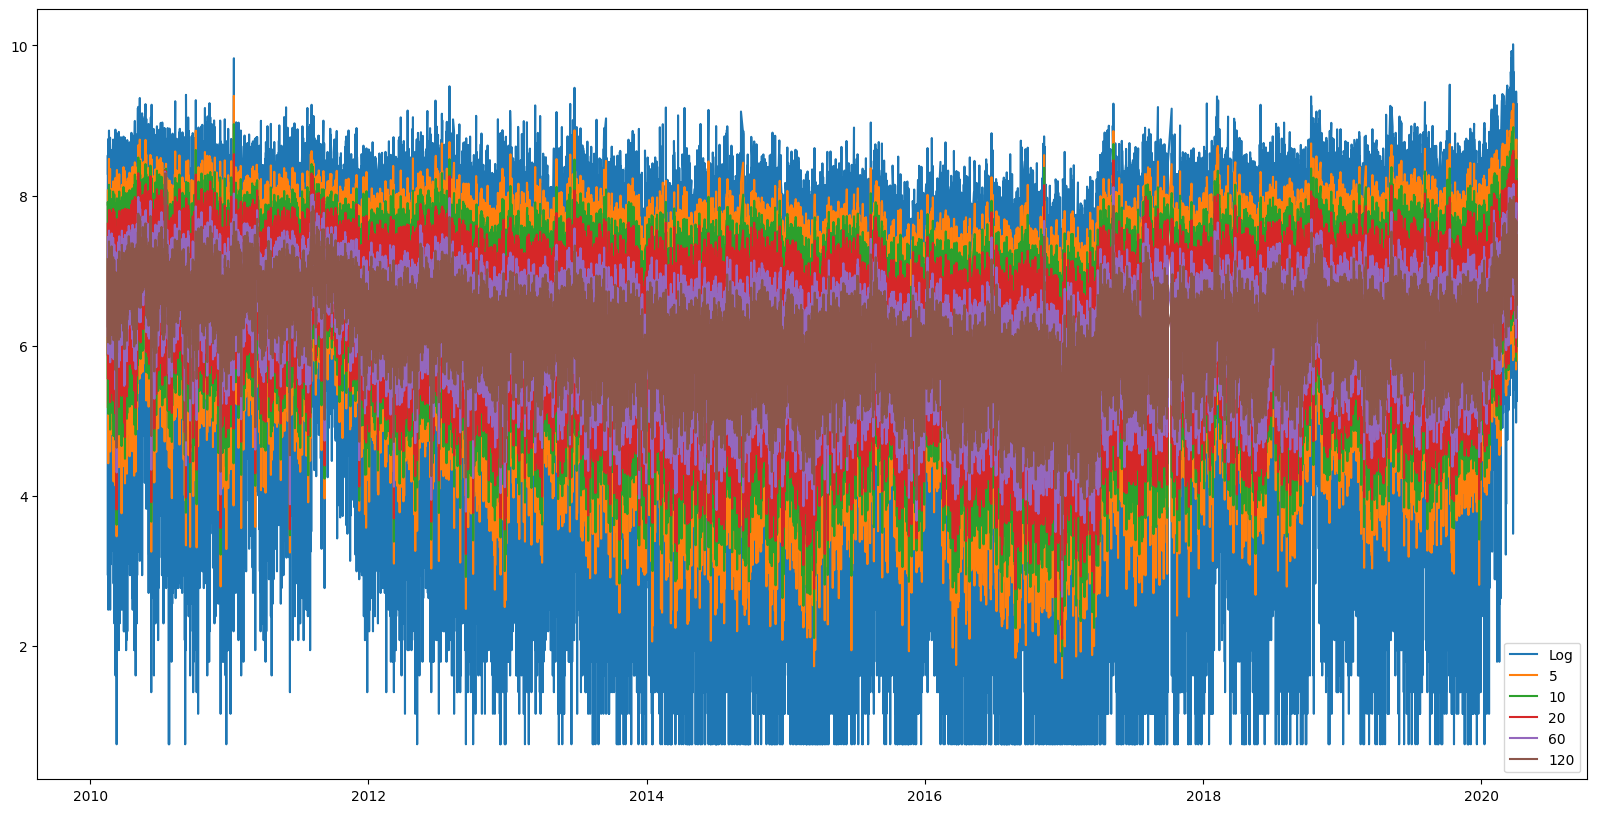

In [163]:
plt.figure(figsize=(20,10))
plt.plot(data['vol_log'], label = 'Log')
for window in windows:
    print(window)
    plt.plot(data['vol_transform_ema{}'.format(window)], label = window)
plt.legend()
plt.show()

## 6. 보조 지표
- 추세 지표, 변동성 지표, 모멘텀 지표 그리고 시장강도 지표로 구분
- 추세 지표
    - 가격에 대한 추세를 알아보는 지표
    - 이동평균, MACD, ROC, DMI&ADX 등
- 변동성 지표
    - 얼마나 빠르게 상승 또는 하락할 것인지
    - 볼린저밴드, Envelope 등
- 모멘텀 지표
    - 투자 심리나 현재 추세에 대한 유효성을 확인하는 지표로 사용
    - Monetum, Stochastic, CCI, MACD Oscillator 등
- 시장 강도 지표
    - 추세나 변동성에 대한 지표를 나타냄. 거래량을 포함시켜 가격 예측
    - MA, OBV, RSI


### (1) MACD
- [ MACD 계산식 ]
    - 1) MACD : 12일 EMA - 26일 EMA
    - 2) Signal : MACD 9일 EMA
    - 3) Oscillator : MACD - Signal